## Decision Tree


In [5]:
from operator import irshift
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


In [2]:
data_import = pd.read_csv("clothing_size.csv")
data_import

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


# Basic EDA

In [3]:
data_import["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

### Dealing with NA values

In [4]:
data_step_one = data_import.copy()

data_step_one = data_step_one.dropna(axis=0)

dropped_rows = len(data_import)-len(data_step_one)

print("Rows Dropped: ",dropped_rows)

Rows Dropped:  581


#### We will also drop XXL records since we don't have a representative amount of this data

In [6]:
data_step_one = data_step_one[data_step_one["size"] != "XXL"]
data_step_one


,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


##### Train test split

In [7]:
X =data_step_one[["weight","age","height"]]
y=data_step_one["size"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Modeling
#### single run

In [18]:
def decision_tree_run(depth):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    return tree_clf.score(X_test, y_test)

decision_tree_run(None)

0.50127232938063

#### Multiple runs with different tree depths

In [14]:
accuracy = []
tree_depths = list(range(2,100,3))

In [15]:
for i in tree_depths:
    accuracy.append(decision_tree_run(i))

accuracy

[0.44221079953178277,
 0.5035370756781515,
 0.512188915466436,
 0.5123415949921115,
 0.5068196854801771,
 0.5021884065346837,
 0.5015013486691434,
 0.5014250089063057,
 0.5013995623186931,
 0.5011196498549545,
 0.5014759020815309,
 0.5012214362054048,
 0.5011959896177922,
 0.5012977759682427,
 0.5013486691434679,
 0.5014250089063057,
 0.5013741157310805,
 0.5013486691434679,
 0.50127232938063,
 0.50127232938063,
 0.5010942032673419,
 0.5012214362054048,
 0.5015522418443686,
 0.5013995623186931,
 0.5013741157310805,
 0.5011196498549545,
 0.5014250089063057,
 0.5013741157310805,
 0.5012977759682427,
 0.5011196498549545,
 0.5014759020815309,
 0.5014250089063057,
 0.5012468827930174]

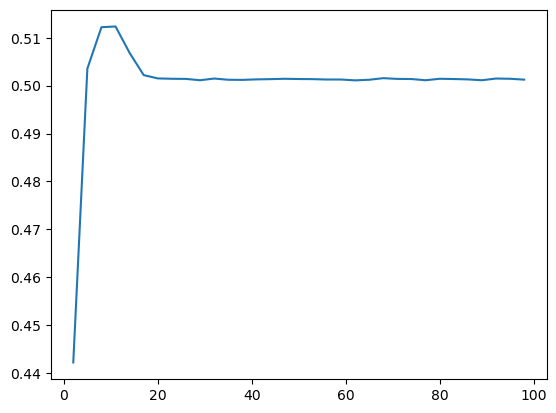

In [16]:
plt.plot(tree_depths, accuracy)

In [22]:
 tree_clf = DecisionTreeClassifier(max_depth=5)
 tree_clf.fit(X_train, y_train)

results = pd.DataFrame(data={"Predictions":tree_clf.predict(X_test).tolist(),"Acturals": y_test.to_list()})

results["Matching"] = results.apply(lambda x: "Correct" if x["Predictions"] == x["Acturals"] else "Wrong", axis=1)

In [23]:
export_graphviz(
    tree_clf,
    out_file="iris_tree_dot",
    feature_names=X_train.columns,
    rounded= True,
    filled= True
)